# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

In [1]:
# a teď už je to na vás 💪
# níže vložte své řešení
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import nxviz as nv
import netwulf as nw
import matplotlib.gridspec as gridspec

## Příprava dat

In [2]:
data = pd.read_csv('d.csv')
data

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,U2991Z301,Hněvice,T58005,Hněvice seř.n.,4:53:00,4:54:30,2,0,1,1,1,1,1,0,0
1,T58005,Hněvice seř.n.,U4610Z301,Záluží,4:54:30,4:56:00,2,0,1,1,1,1,1,0,0
2,U4610Z301,Záluží,U4609Z301,Dobříň,4:56:00,4:59:00,2,0,1,1,1,1,1,0,0
3,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,4:59:00,5:03:00,2,0,1,1,1,1,1,0,0
4,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,4:36:00,4:38:00,2,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642428,U394Z2P,Motol,U395Z2P,Krematorium Motol,17:45:00,17:46:00,0,0,1,1,1,1,1,0,0
1642429,U395Z2P,Krematorium Motol,U113Z2P,Hlušičkova,17:46:00,17:47:00,0,0,1,1,1,1,1,0,0
1642430,U113Z2P,Hlušičkova,U236Z2P,Slánská,17:47:00,17:49:00,0,0,1,1,1,1,1,0,0
1642431,U236Z2P,Slánská,U47Z2P,Blatiny,17:49:00,17:50:00,0,0,1,1,1,1,1,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


Vidíme, že nechybí žádné hodnoty, ale přesto je třeba udělat pár změn.

Nyní si upravíme všechny indikátory na datatype `bool`.

In [4]:
data = data.astype({'is_night': bool, 'monday': bool, 'tuesday':bool , 'wednesday':bool, 'thursday':bool, 'friday':bool, 'saturday':bool, 'sunday':bool})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  bool  
 8   monday          1642433 non-null  bool  
 9   tuesday         1642433 non-null  bool  
 10  wednesday       1642433 non-null  bool  
 11  thursday        1642433 non-null  bool  
 12  friday          1642433 non-null  bool  
 13  saturday        1642433 non-null  bool  
 14  sunday          1642433 non-null  bool  
dtypes: bool(8), int64(1), object(6)
memory usage: 100.2+ MB


Podle zadání si upravíme nesprávné časové údaje, aby se vešly do 24hodinového formátu.

In [5]:
def convertTime(time: str) -> str:
    b, rest = time.split(':', 1)
    b = int(b)
    if(b < 24):
        return time
    b = b % 24
    return str(b) + ':' + rest

In [6]:
data['depart_from'] = data['depart_from'].apply(convertTime)
data['arrive_to'] = data['arrive_to'].apply(convertTime)


## Vizualizace sítě

Vzhledem k obrovkému množství dat vykreslíme jen tramvajovou síť, která má podle dokumentace `route_type` 0.

In [7]:
tram = data[data['route_type'] == 0]
tram

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
35575,U865Z2P,Vozovna Motol,U394Z2P,Motol,6:07:00,6:08:00,0,False,True,True,True,True,True,False,False
35576,U394Z2P,Motol,U395Z2P,Krematorium Motol,6:08:00,6:09:00,0,False,True,True,True,True,True,False,False
35577,U395Z2P,Krematorium Motol,U113Z2P,Hlušičkova,6:09:00,6:10:00,0,False,True,True,True,True,True,False,False
35578,U113Z2P,Hlušičkova,U236Z2P,Slánská,6:10:00,6:12:00,0,False,True,True,True,True,True,False,False
35579,U236Z2P,Slánská,U47Z2P,Blatiny,6:12:00,6:13:00,0,False,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642428,U394Z2P,Motol,U395Z2P,Krematorium Motol,17:45:00,17:46:00,0,False,True,True,True,True,True,False,False
1642429,U395Z2P,Krematorium Motol,U113Z2P,Hlušičkova,17:46:00,17:47:00,0,False,True,True,True,True,True,False,False
1642430,U113Z2P,Hlušičkova,U236Z2P,Slánská,17:47:00,17:49:00,0,False,True,True,True,True,True,False,False
1642431,U236Z2P,Slánská,U47Z2P,Blatiny,17:49:00,17:50:00,0,False,True,True,True,True,True,False,False


Vytvoříme graf jako instanci třídy `Graph`. Vzhledem k povaze úlohy uvažujeme neorientovaný graf.

In [8]:
G = nx.Graph()


Nyní si napíšeme jednoduchou funkci, která nám získá z každého spoje důležité informace.

In [9]:
def rowData(row: pd.Series):
    start = row['stop_from_name']
    end = row['stop_to_name']
    isNight = row['is_night']
    count = 0
    workDays = 0
    weekendDays = 0
    for col in row.index.to_list():
        if col.endswith('day'):
            count += row[col]
            if col == 'sunday' or col == 'saturday':
                weekendDays += row[col]
            else:
                workDays += row[col]
        
    return start, end, count, isNight, workDays, weekendDays
    


Následně projdeme jednotlivé řádky a přidáme jednotlivé stanice jako vrcholy a spoje jako hrany našeho grafu. Váha každé hrany bude součet tramvají, které za jednotlivý týden daný úsek projede.

In [10]:
for i, row in tram.iterrows():
    start, end, count, isNight, workDays, weekendDays = rowData(row)
    G.add_node(start)
    G.add_node(end)
    if(G.has_edge(row['stop_from_name'], row['stop_to_name'])):
        G[row['stop_from_name']][row['stop_to_name']]['weight'] += count
    else:
        G.add_edge(row['stop_from_name'], row['stop_to_name'], weight = count)


K rozumnému vykreslení našeho grafu využijeme soubor `stops.txt`.

In [11]:
stops = pd.read_csv('stops.txt')
stops = stops[['stop_name', 'stop_lat','stop_lon']]

Vzhledem k tomu, že stanice se může vyskytovat vícekrát v daném datasetu, seskupíme všechny podle názvu a vezmeme průměr jejich souřadnic.

In [12]:
stops = stops.groupby('stop_name')['stop_lat', 'stop_lon'].mean()
stops.reset_index(inplace = True)

In [13]:
n = list(G.nodes)
n = pd.DataFrame (n, columns = ['stop_name'])
merged = n.merge(stops, on = ['stop_name'])

Nyní už jen naplníme náš slovník stanic podle jejich souřadnic.

In [14]:
pos = {}
for i, row in merged.iterrows():
    pos[row['stop_name']] = np.array([row['stop_lon'],row['stop_lat']])

Podívejme se nyní na váhy jednotlivých hran.

In [46]:
widths = nx.get_edge_attributes(G, 'weight')

Budeme chtít tloušťku jednotlivých hran znázornit v závislosti na jejich váze ('weight'). 
Vzhledem k velkému rozpětí vah hran využijeme jednoduchou MinMax normalizaci.

In [16]:
MIN = min(widths.values())
MAX = max(widths.values())

for k,v in widths.items():
    widths[k] = (v - MIN)/(MAX - MIN)*2.

Mít label k každému vrcholu by bylo příliš nepřehledné, tudíž je uděláme pouze pro koncové stanice, čili takové se stupněm 1.

In [17]:
important = [node for (node, deg) in G.degree() if deg == 1]
labels = {}
for node in important:
    labels[node] = node

pos_higher = {}
for k, v in pos.items():
    pos_higher[k] = (v[0], v[1]+0.002)

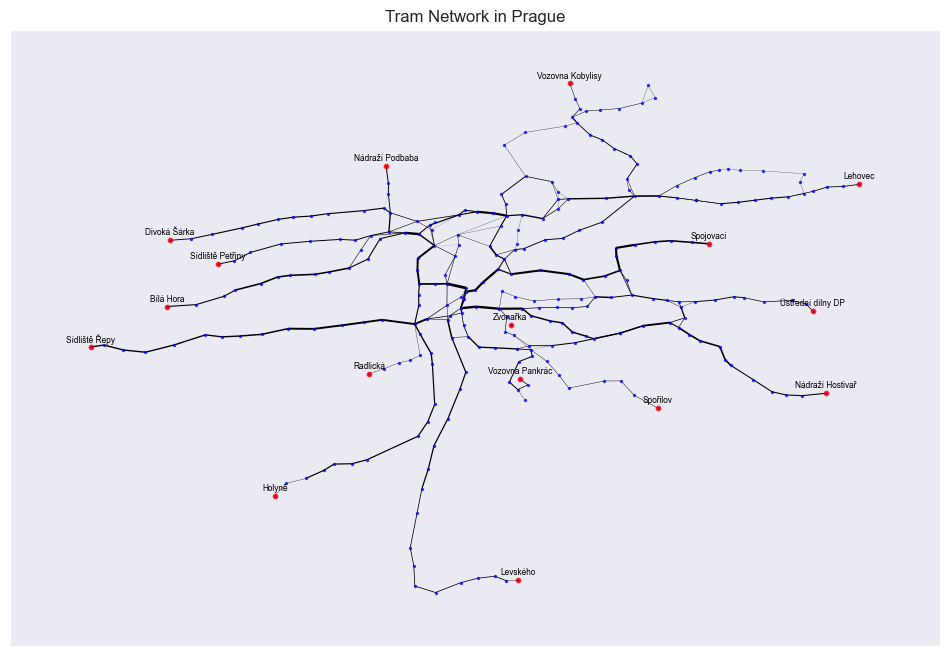

In [18]:
sns.set_style("darkgrid")
nodelist = G.nodes()

fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Tram Network in Prague')

nx.draw_networkx_nodes(G ,pos = pos,
                       nodelist=nodelist,
                       node_size=2,
                       node_color='blue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos = pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='black',
)
nx.draw_networkx_nodes(G ,pos = pos,
                       nodelist=important,
                       node_size=10,
                       node_color='red',
                       alpha=0.7)

nx.draw_networkx_labels(G,pos = pos_higher,labels = labels ,font_size=6,font_color='black')
ax.grid(False)
None

Kvůli kolizím názvů se sítí nyní ručně posuneme labely, aby se nepřekrývaly.


In [19]:
LabelPos = pos_higher.copy()

In [20]:
Holyne = list(LabelPos['Holyně'])
Holyne[1] -= 0.005
LabelPos['Holyně']  = tuple(Holyne)

Petriny = list(LabelPos['Sídliště Petřiny'])
Petriny[1] -= 0.005
LabelPos['Sídliště Petřiny']  = tuple(Petriny)

Zvonarka = list(LabelPos['Zvonařka'])
Zvonarka[1] -= 0.003
Zvonarka[0] += 0.008
LabelPos['Zvonařka']  = tuple(Zvonarka)

Pankrac = list(LabelPos['Vozovna Pankrác'])
Pankrac[1] -= 0.01
Pankrac[0] += 0.012
LabelPos['Vozovna Pankrác']  = tuple(Pankrac)

Radlicka = list(LabelPos['Radlická'])
Radlicka[0] -= 0.004
LabelPos['Radlická']  = tuple(Radlicka)

Sporilov = list(LabelPos['Spořilov'])
Sporilov[0] += 0.006
LabelPos['Spořilov']  = tuple(Sporilov)

Dilny = list(LabelPos['Ústřední dílny DP'])
Dilny[1] -= 0.005
LabelPos['Ústřední dílny DP']  = tuple(Dilny)


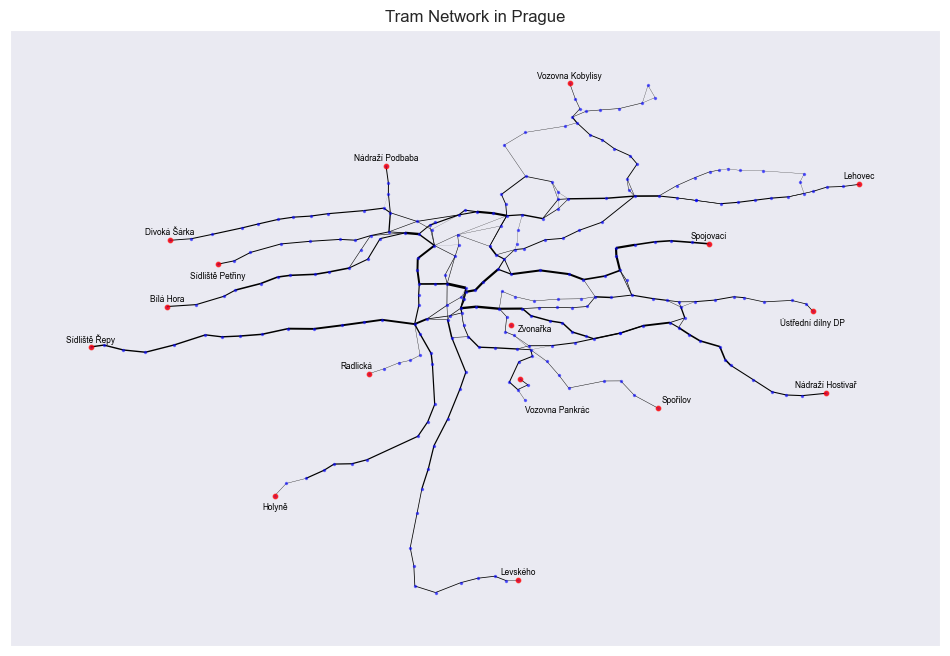

In [21]:
nodelist = G.nodes()

fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Tram Network in Prague')
ax.grid(False)

nx.draw_networkx_nodes(G ,pos = pos,
                       nodelist=nodelist,
                       node_size=2,
                       node_color='blue',
                       alpha=0.5)
nx.draw_networkx_edges(G,pos = pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='black',
)
nx.draw_networkx_nodes(G ,pos = pos,
                       nodelist=important,
                       node_size=10,
                       node_color='red',
                       alpha=0.7)

nx.draw_networkx_labels(G,pos = LabelPos,
                        labels = labels,
                        font_size=6,
                        font_color='black')
None

## Vizualice měr centrality

### Stupňová centralita

Tato metrika je určená stupněm každého vrcholu.

$$C_D(v) = deg(v)$$

In [22]:
sns.set_style("darkgrid")

palette = sns.color_palette("hls", 10)
sns.set_palette(palette)

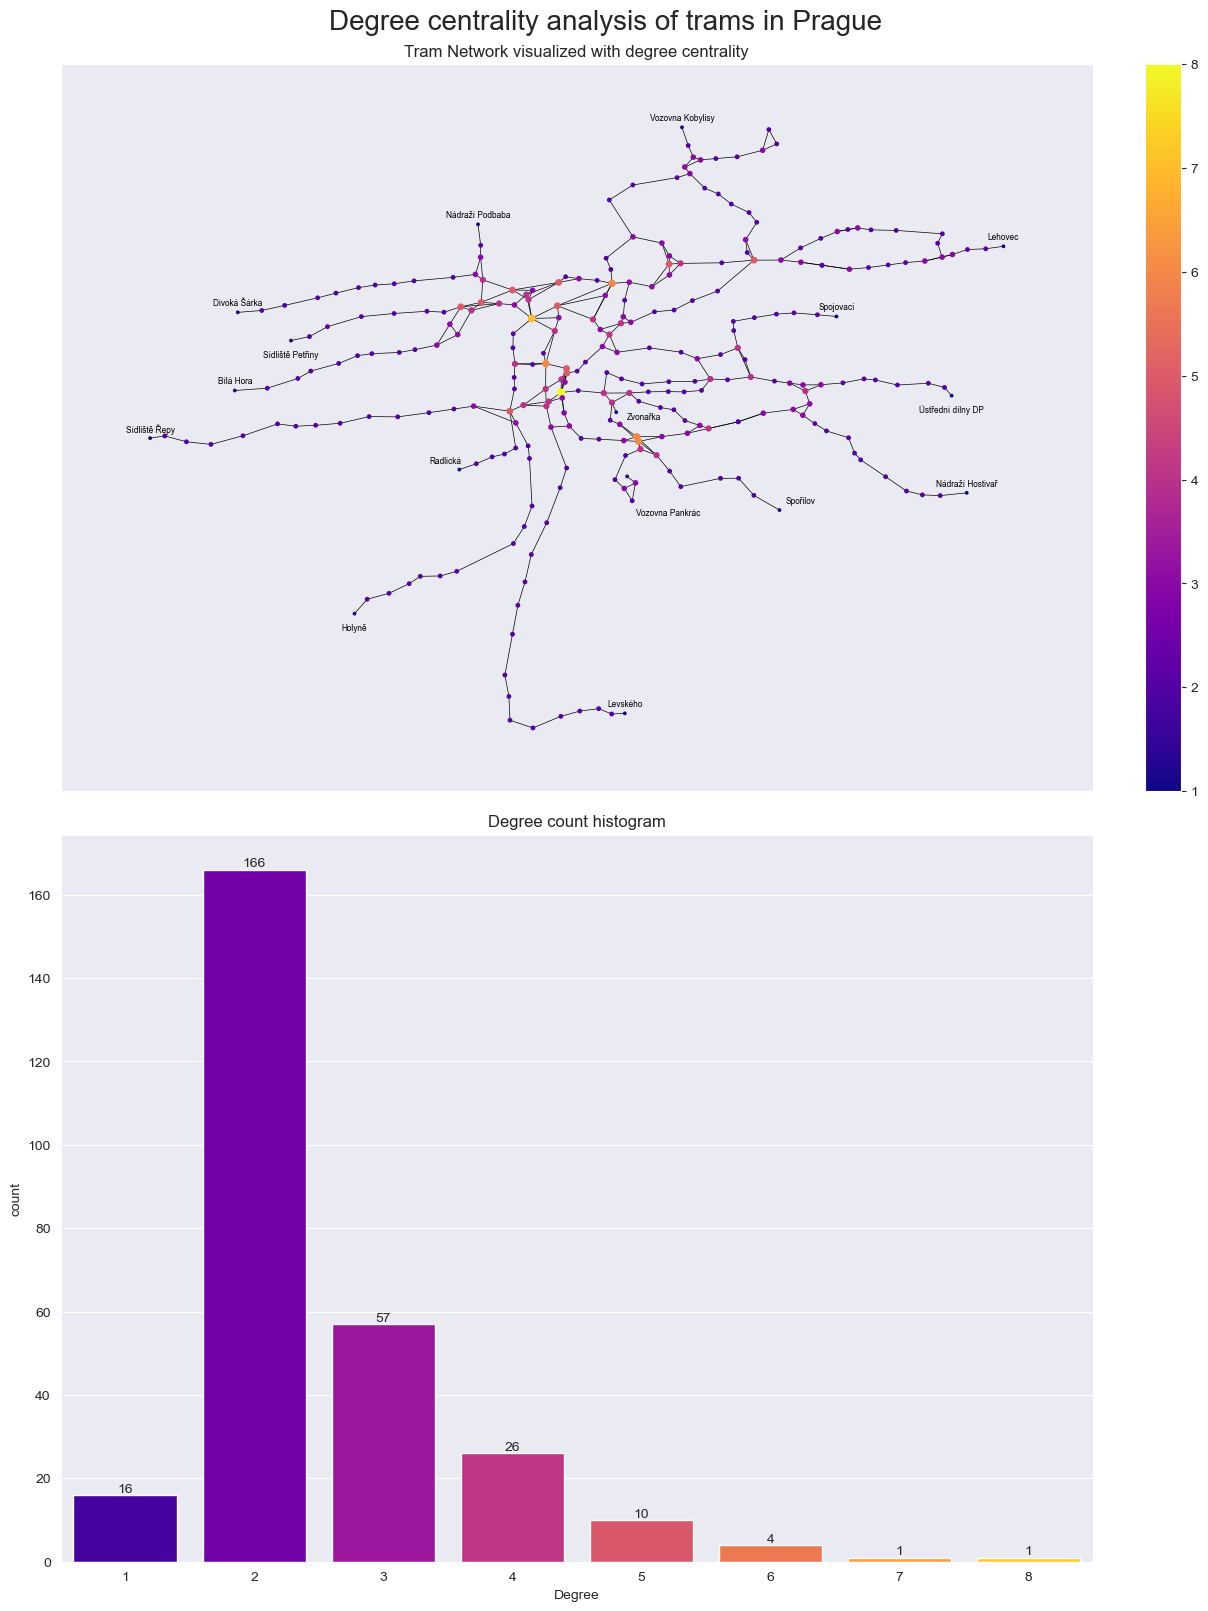

In [23]:
import matplotlib.colors as mcolors


fig = plt.figure(figsize=(12,16), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec[0, :]) 
ax2 = fig.add_subplot(spec[1, :]) 

fig.suptitle('Degree centrality analysis of trams in Prague', fontsize = 20)
ax1.set_title('Tram Network visualized with degree centrality')
degrees = G.degree() 
nodes = G.nodes()
centrality = np.asarray([degrees[n] for n in nodes])
sc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=centrality, cmap='plasma',
                            node_size=centrality * 3, ax = ax1)
nx.draw_networkx_edges(G,pos = pos,
                       edgelist = G.edges(),
                       width=0.5,
                       edge_color='black', ax = ax1
)
sc.set_norm(mcolors.Normalize(1, 8))
fig.colorbar(sc, ax = ax1)

nx.draw_networkx_labels(G,pos = LabelPos,
                        labels = labels,
                        font_size=6,
                        font_color='black', ax = ax1)

ax1.grid(False)
ax2.set_title('Degree count histogram')


deg = pd.DataFrame.from_dict(degrees)
g = sns.countplot(data=deg, x=1, ax=ax2)
ax2.bar_label(ax2.containers[0])
ax2.set_xlabel('Degree')

cm = sns.color_palette("plasma",8)
for bin_,i in zip(g.patches,cm):
    bin_.set_facecolor(i)

None

Z daného grafu můžeme vyčíst nejdůležitější tramvajové uzly, podle jejich stupně. Všímáme si, že síť má hodně stromovitou strukturu vzhledem k velkému počtu stanic se stupněm 2.

### Centralita blízkosti

Tato metrika vyjadřuje průměrnou vzdálenost vrcholu od všech ostatních vrcholů. 
$$ C_C(v) = {1 \over \sum_{u \in V} d_{vu}  }$$ 


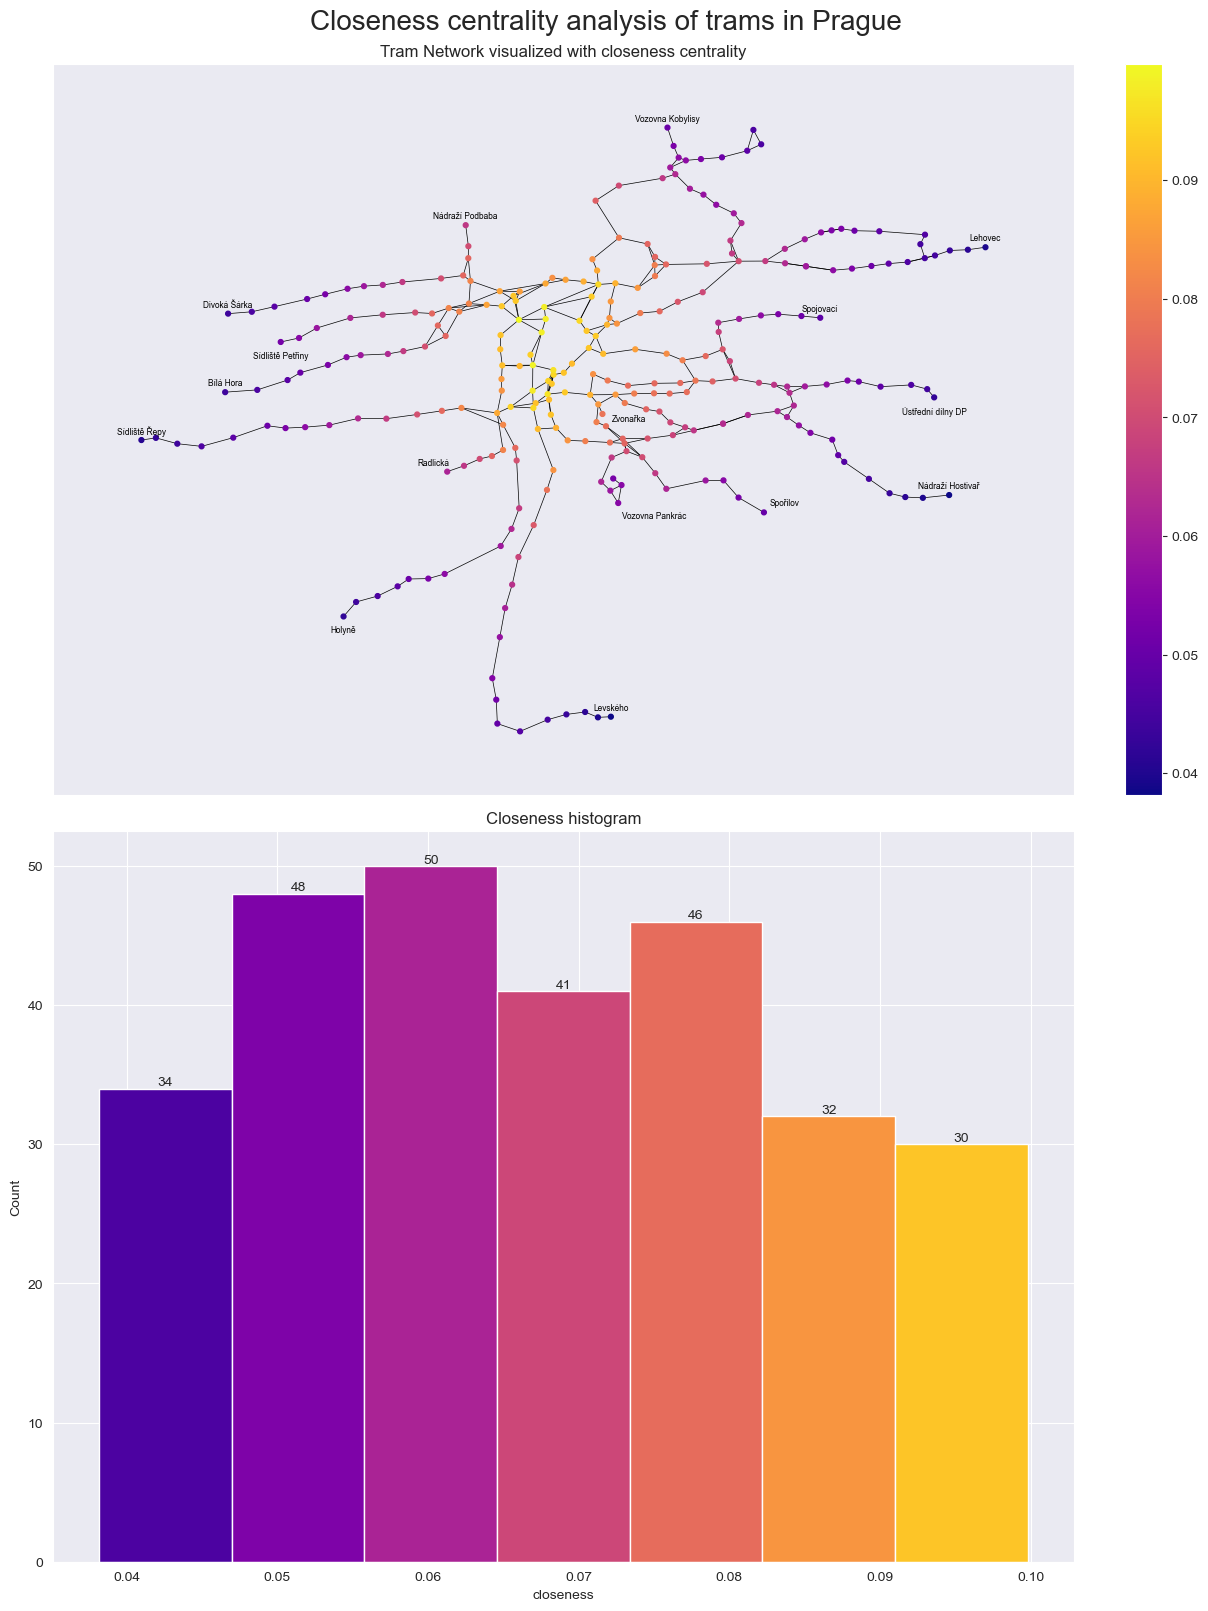

In [24]:
fig = plt.figure(figsize=(12,16), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec[0, :]) 
ax2 = fig.add_subplot(spec[1, :]) 

fig.suptitle('Closeness centrality analysis of trams in Prague', fontsize = 20)
ax1.set_title('Tram Network visualized with closeness centrality')
closeness_centrality = nx.closeness_centrality(G, wf_improved = False)
nodes = G.nodes()
centrality = np.asarray([closeness_centrality[n] for n in nodes])
sc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=centrality, cmap='plasma',
                            node_size=12, ax = ax1)
fig.colorbar(sc, ax = ax1)
nx.draw_networkx_edges(G,pos = pos, edgelist = G.edges(), width=0.5, edge_color='black', ax = ax1)
nx.draw_networkx_labels(G,pos = LabelPos, labels = labels, font_size=6, font_color='black', ax = ax1)

ax1.grid(False)

ax2.set_title('Closeness histogram')
clo = pd.DataFrame.from_dict([closeness_centrality])
clo = clo.unstack().reset_index().drop(columns=['level_1']).rename(columns={'level_0': 'name', 0: 'closeness'})

cm = sns.color_palette("plasma",7)

g = sns.histplot(data = clo, x = 'closeness', bins = 7, ax=ax2)
for bin_,i in zip(g.patches,cm):
    bin_.set_facecolor(i)

ax2.bar_label(ax2.containers[0])

None

V našem grafu tato metrika znázorňuje důležitost zastávek podle počtu projetých zastávek mezi jednotlivými stanicemi, která je úměrná skutečné geografické vzdálenosti. V našem případě dokonce vidíme relativně rovnoměrné rozdělení, což znamená, že jsou zastávky více rozprostřené ve středu.


### Centralita mezilehlosti

Tato metrika znázorňuje, přes které vrcholy proudí nejvíce informací. Vyjadřuje frekvenci, s jakou se vrchol objevuje na cestách mezi jinými vrcholy.
$$ C_B(v) =  \sum_{s \neq u \neq v \in V} {g_{st}(v) \over g_{st} }$$ 

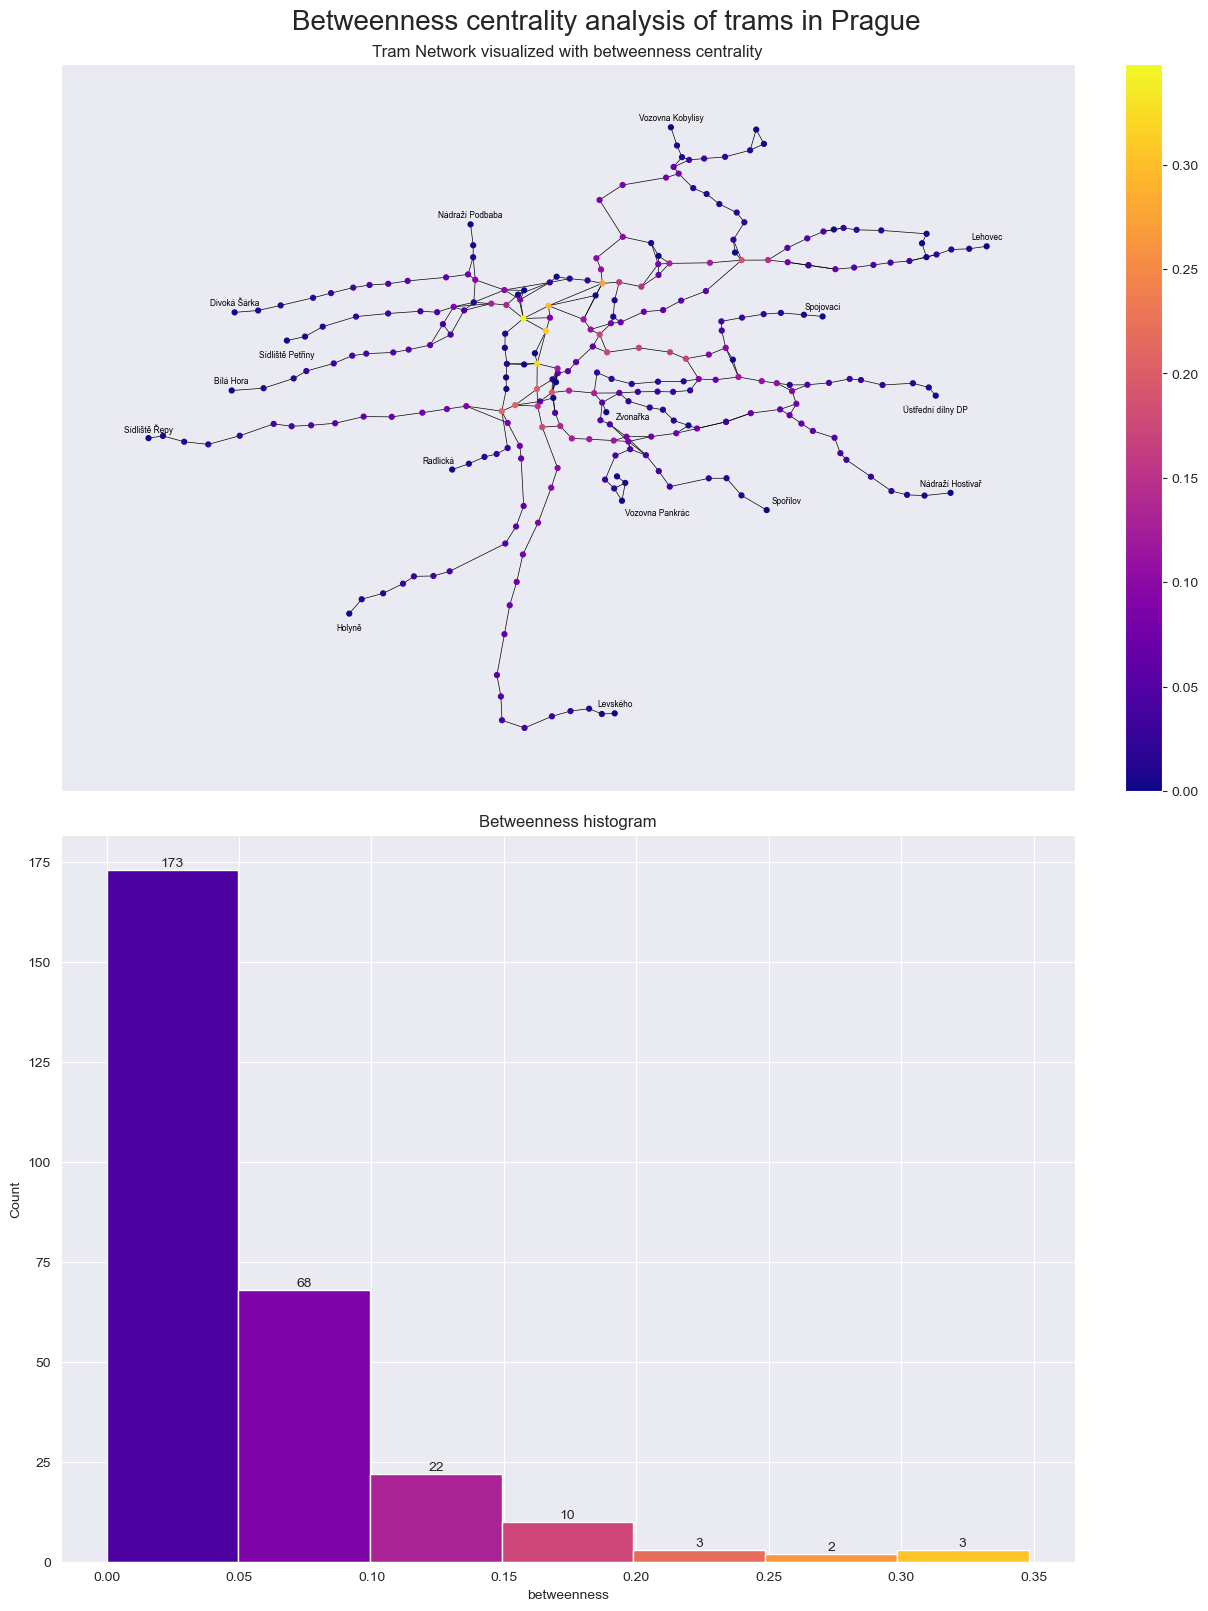

In [25]:
fig = plt.figure(figsize=(12,16), constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec[0, :]) 
ax2 = fig.add_subplot(spec[1, :]) 

fig.suptitle('Betweenness centrality analysis of trams in Prague', fontsize = 20)
ax1.set_title('Tram Network visualized with betweenness centrality')
betweenness_centrality = nx.betweenness_centrality(G)
nodes = G.nodes()
centrality = np.asarray([betweenness_centrality[n] for n in nodes])
sc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=centrality, cmap='plasma',
                            node_size=12, ax = ax1)
fig.colorbar(sc, ax = ax1)
nx.draw_networkx_edges(G,pos = pos, edgelist = G.edges(), width=0.5, edge_color='black', ax = ax1)
nx.draw_networkx_labels(G,pos = LabelPos, labels = labels, font_size=6, font_color='black', ax = ax1)

ax1.grid(False)

ax2.set_title('Betweenness histogram')
bet = pd.DataFrame.from_dict([betweenness_centrality])
bet = bet.unstack().reset_index().drop(columns=['level_1']).rename(columns={'level_0': 'name', 0: 'betweenness'})

cm = sns.color_palette("plasma",7)

g = sns.histplot(data = bet, x = 'betweenness', bins = 7, ax=ax2)
for bin_,i in zip(g.patches,cm):
    bin_.set_facecolor(i)

ax2.bar_label(ax2.containers[0])

None

Tata vizualizace nám zvýrazňuje zastávky, které spojují různé tramvajové linky. Jasně v nich vidíme důležitá přestupní místa pro nezávislé linky. Zároveň díky tomu můžeme odhadnout, že síť tvoří spoustu přímých cest.

## Vlastní otázky


### 1. Mění se důležité zastávky v závislosti na denním/nočním provozu?

Vytvoříme si dva různé grafy, které budeme vizualizovat.

In [26]:
dayG = nx.Graph()
nightG = nx.Graph()

In [27]:
for i, row in tram.iterrows():
    start, end, count, isNight, workDays, weekendDays = rowData(row)
    nightG.add_node(start)
    nightG.add_node(end)
    dayG.add_node(start)
    dayG.add_node(end)
    if(isNight == True):
        if(nightG.has_edge(start,end)):
            nightG[start][end]['weight'] += count
        else:
            nightG.add_edge(start, end, weight = count)
    else:
        if(dayG.has_edge(start, end)):
            dayG[start][end]['weight'] += count
        else:
            dayG.add_edge(start, end, weight = count)



Opět je nutné hrany znormalizovat, jednak kvůli vysokým rozptylům, avšak nyní je to obzvlášť nutné vzhledem k faktu, že ve dne jezdí tramvají více.

In [28]:
widthsDay = nx.get_edge_attributes(dayG, 'weight')
widthsNight = nx.get_edge_attributes(nightG, 'weight')


In [29]:
def normalizeWeight(w):
    MIN = min(w.values())
    MAX = max(w.values())

    for k,v in w.items():
        w[k] = (v - MIN)/(MAX - MIN)*2.
    return w


In [30]:
widthsDay  = normalizeWeight(widthsDay)
widthsNight = normalizeWeight(widthsNight)


In [31]:
def weightGraph(G, w, ax, title):
    nodelist = G.nodes()
    ax.grid(False)
    ax.set_title(title)

    nx.draw_networkx_nodes(G ,pos = pos,
                        nodelist=nodelist,
                        node_size=2,
                        node_color='blue',
                        alpha=0.5,
                        ax = ax)
    nx.draw_networkx_edges(G,pos = pos,
                        edgelist = w.keys(),
                        width=list(w.values()),
                        edge_color='black',
                        ax = ax)
    nx.draw_networkx_nodes(G ,pos = pos,
                        nodelist=important,
                        node_size=10,
                        node_color='red',
                        alpha=0.7,
                        ax = ax)

    nx.draw_networkx_labels(G,pos = LabelPos,
                            labels = labels,
                            font_size=6,
                            font_color='black',
                            ax = ax)
    None

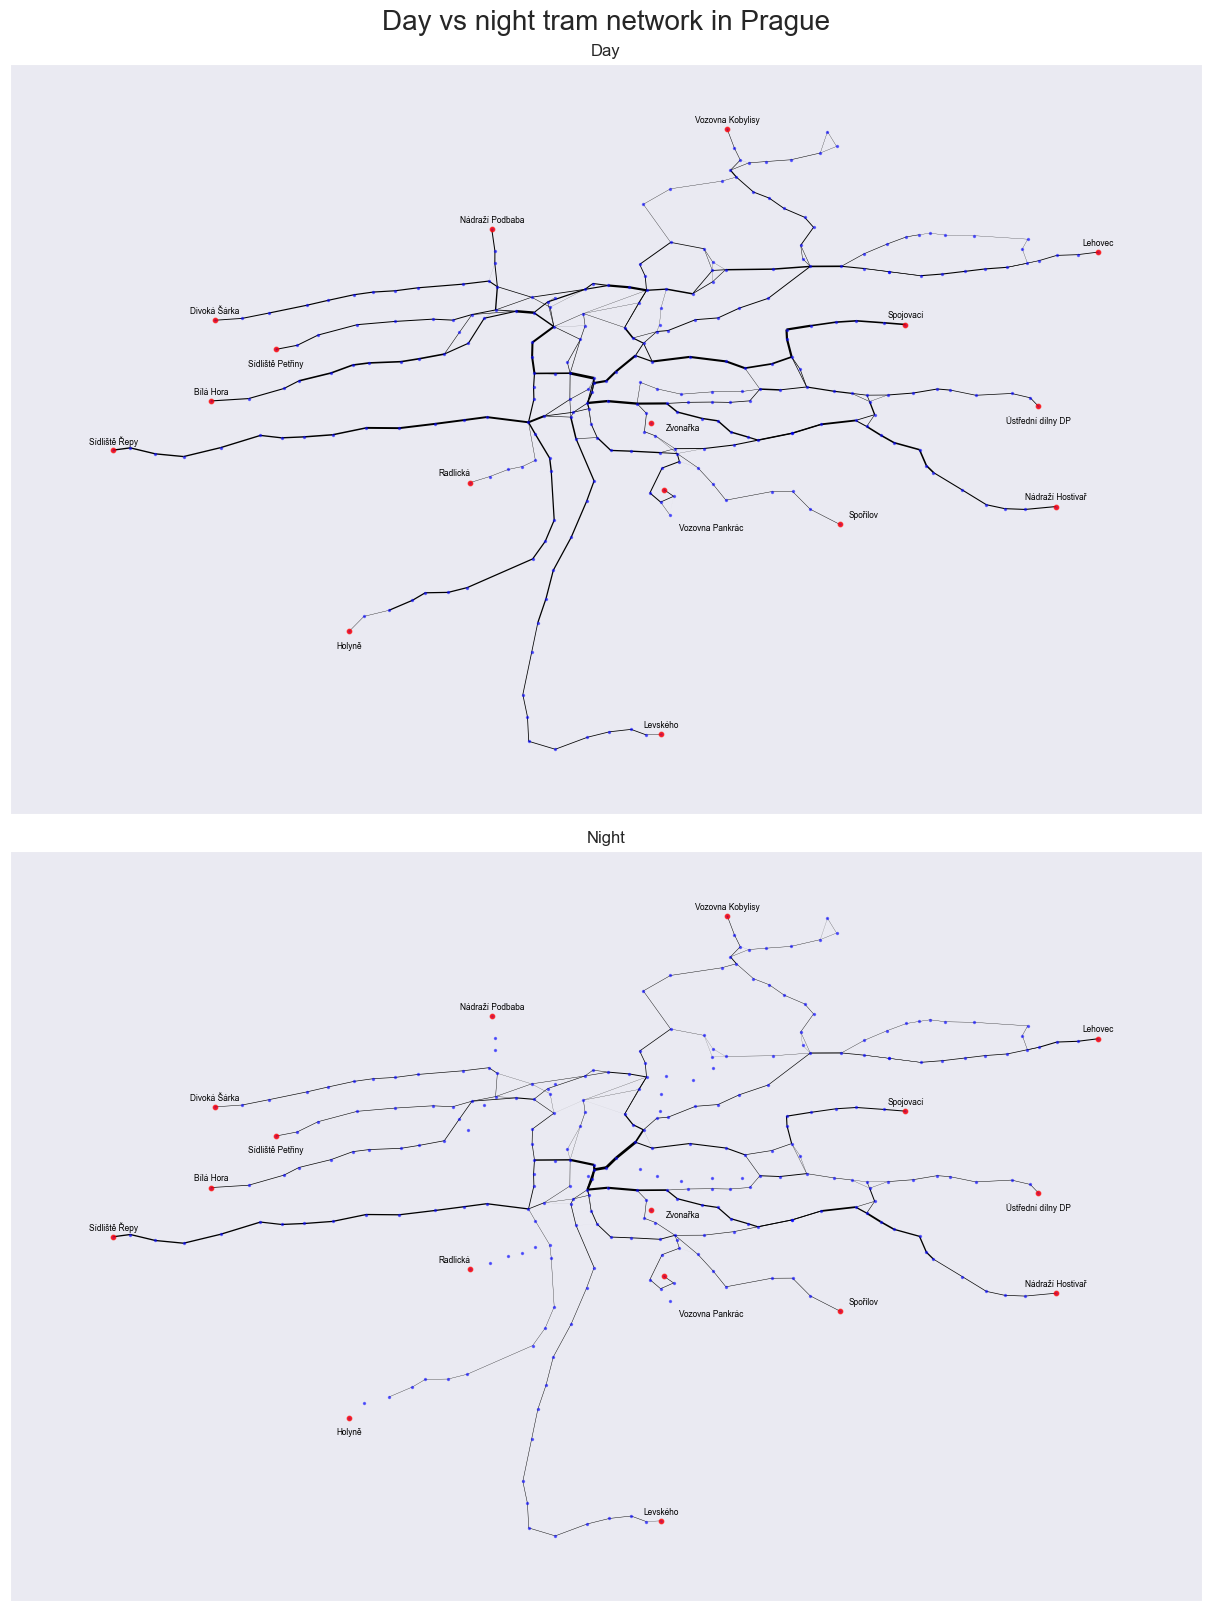

In [32]:
fig = plt.figure(figsize=(12,16), constrained_layout=True)
fig.suptitle('Day vs night tram network in Prague', fontsize = 20)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec[0, :]) 
ax2 = fig.add_subplot(spec[1, :]) 
weightGraph(dayG, widthsDay, ax1, 'Day')
weightGraph(dayG, widthsNight, ax2, 'Night')



Z této vizualizace je patrné, že rozdíl mezi nočními a denními spoji vskutku je. Noční spoje jsou v okrajových destinacích velmi řídké a převážná část spojů je situovaná v centru. Dokonce je dobře vidět centrální přestupní linka Lazarská, kterou dobře známe. Zároveň si můžeme všimnout, že do některých míst noční tramvaje ani nejezdí. \
Denní spoje jsou oproti tomu více rovnoměrně rozdělené, pokrývají všechny stanice (tvoří souvislý graf) a nejsou tak soustředěné na centrum města Prahy.

### 2. Má denní doba vliv na počet tramvají? Porovnejte s metrem.

Krom zřejmého rozdílu počtu nočních a denních linek chceme vypozorovat, zda v určitých hodinách dochází k navýšení počtu linek či ne.

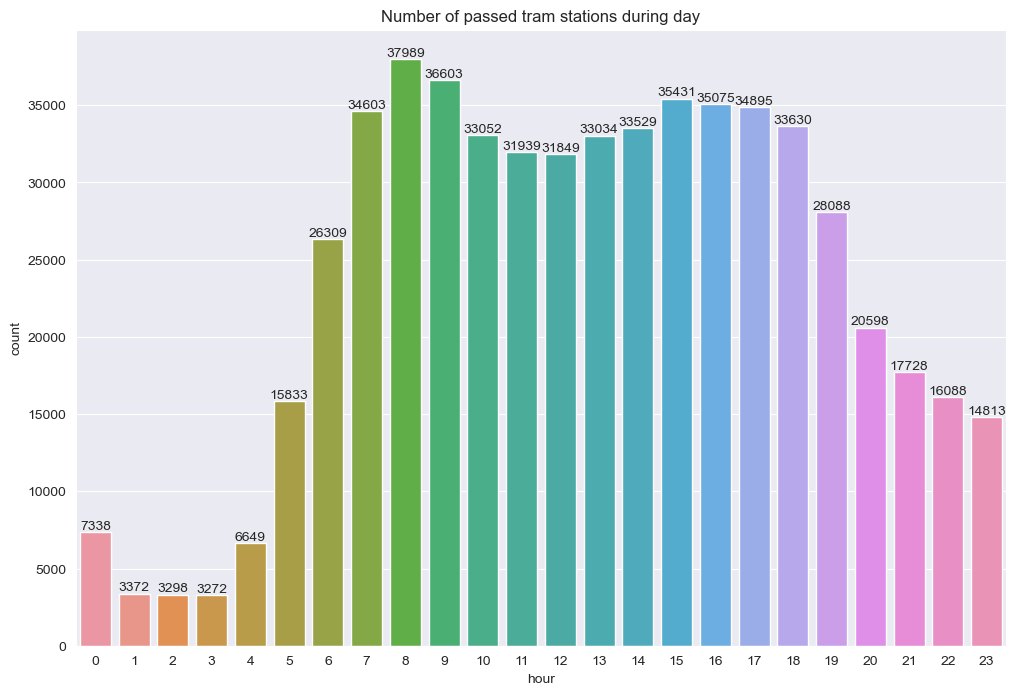

In [33]:
d = pd.DataFrame(tram['depart_from'].copy())
d['depart_from'] = pd.to_datetime(d['depart_from'])
d['hour'] = d['depart_from'].dt.hour

fig, ax = plt.subplots(figsize=(12, 8)) 
plt.title('Number of passed tram stations during day')
g = sns.countplot(data=d, x='hour', ax = ax)

ax.bar_label(ax.containers[0])
None

Zde si můžeme všimnout zajímavé věci, že se počet tramvají se navýší kolem 8. a znovu kolem 3. odpoledne z důvodu toho, že lidé cestují do školy a práce, popř. ze školy a z práce.

Zkusme to nyní udělat i s metrem. Metro má `route_type` 1.

In [34]:
tramMetro = data[(data['route_type'] == 1) | (data['route_type'] == 0 )] 


In [35]:
TM = pd.DataFrame(tramMetro[['depart_from', 'route_type']].copy())
TM['depart_from'] = pd.to_datetime(TM['depart_from'])
TM['hour'] = TM['depart_from'].dt.hour

Vzhledem k nepoměru počtu linek metra a tramvají vezmeme poměry proporčně vzhledem k celkovému počtu.

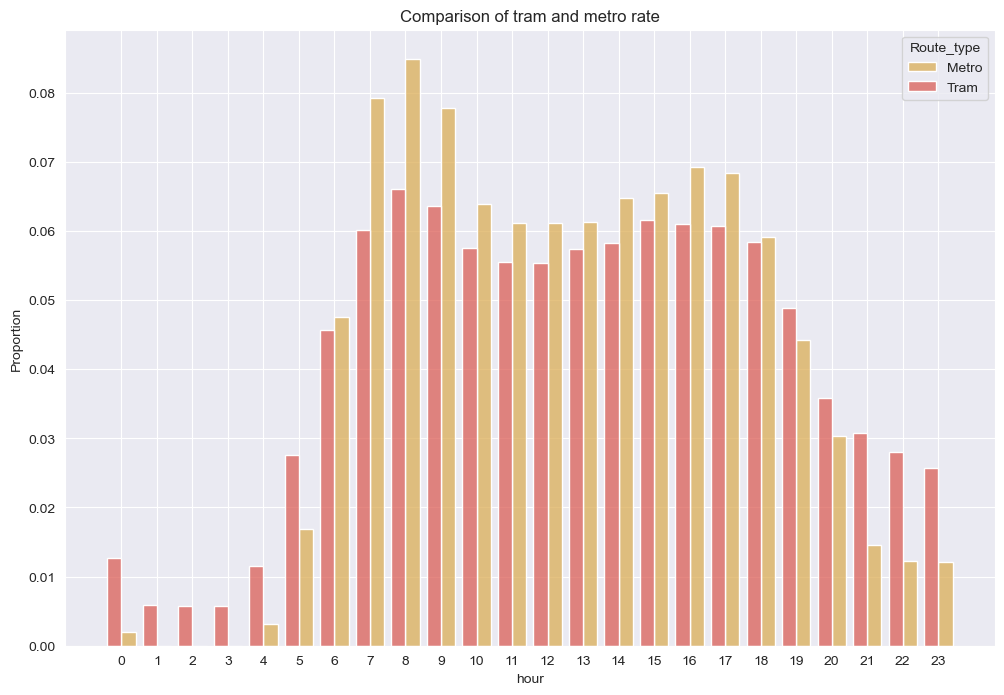

In [45]:
fig, ax = plt.subplots(figsize=(12, 8)) 
plt.title('Comparison of tram and metro rate')
ax = sns.histplot(
   data = TM,
   x = 'hour',
   hue= 'route_type', 
   multiple="dodge",
   stat = 'probability',
   common_norm=False,
   shrink= 0.8, 
   discrete = True
)
ax.set_xticks(range(0, 24, 1))
ax.set_ylabel('Proportion')
ax.legend(title='Route_type', labels=['Metro', 'Tram'])
None

Vidíme velký rozdíl, že metro nejezdí v noci. Též si můžeme všimnout, že počet linek metra je se opět navýší ve špičce kolem 8. hodiny ranní a znovu kolem 15.-16.hodiny. Následně v pozdějších hodinách už ale počet linek metra rapidně klesne.

### 3. Je víkendový provoz tramvají odlišný od všechních dnů?

In [37]:
days = {}
for col in tram.columns:
    if col.endswith('day'):
        days[col] = tram[col].sum()

In [38]:
DFdays = pd.DataFrame.from_dict([days])
DFdays = DFdays.unstack().reset_index().drop(columns=['level_1']).rename(columns={'level_0': 'day', 0: 'count'})

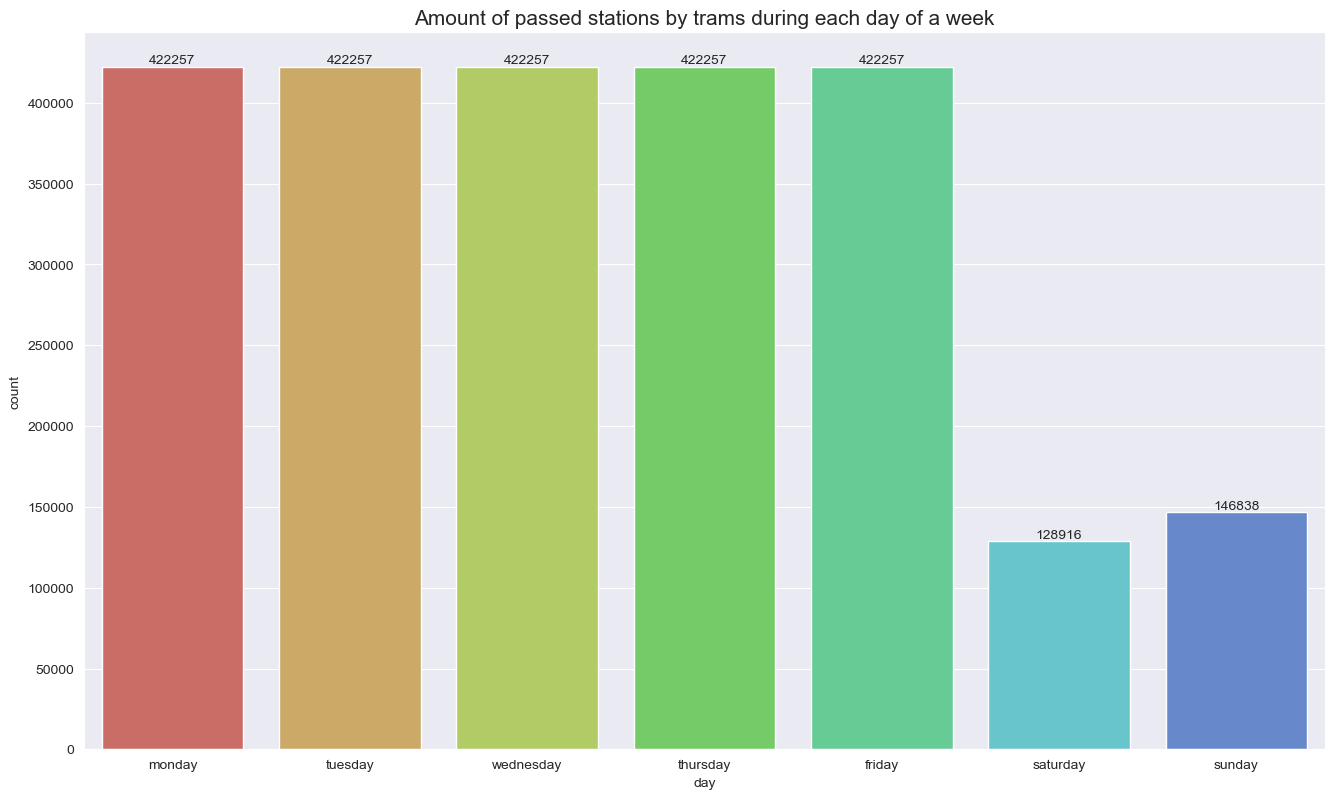

In [39]:
g = sns.catplot(data = DFdays, x = 'day', y = 'count', kind = 'bar')
g.fig.set_size_inches(15, 8)
plt.title('Amount of passed stations by trams during each day of a week', fontsize = 15)

ax = g.facet_axis(0, 0)
ax.bar_label(ax.containers[0])

None


Vidíme, že se počet projetých zástavek tramvajemi o víkendu velmi snížil, což nás nepřekvapuje. Zároveň je zajímavé, že počet je konstantní pro všechny všední dny.

Mohla by nás ještě zajímat vytíženost jednotlivých úseků během víkendu oproti pracovnímu dni, tedy uděláme podobnou analýzu jako v prvním úkolu.

In [40]:
WorkdayG = nx.Graph()
WeekendG = nx.Graph()

In [41]:
for i, row in tram.iterrows():
    start, end, count, isNight, workDays, weekendDays = rowData(row)
    WorkdayG.add_node(start)
    WorkdayG.add_node(end)
    WeekendG.add_node(start)
    WeekendG.add_node(end)
    if(workDays > 0):
        if(WorkdayG.has_edge(start,end)):
            WorkdayG[start][end]['weight'] += workDays
        else: 
            WorkdayG.add_edge(start, end, weight = workDays)

    if(weekendDays > 0):
        if(WeekendG.has_edge(start, end)):
            WeekendG[start][end]['weight'] += weekendDays
        else:
            WeekendG.add_edge(start, end, weight = weekendDays)



In [42]:
widthsWork = nx.get_edge_attributes(WorkdayG, 'weight')
widthsWeekend = nx.get_edge_attributes(WeekendG, 'weight')

widthsWork  = normalizeWeight(widthsWork)
widthsWeekend = normalizeWeight(widthsWeekend)


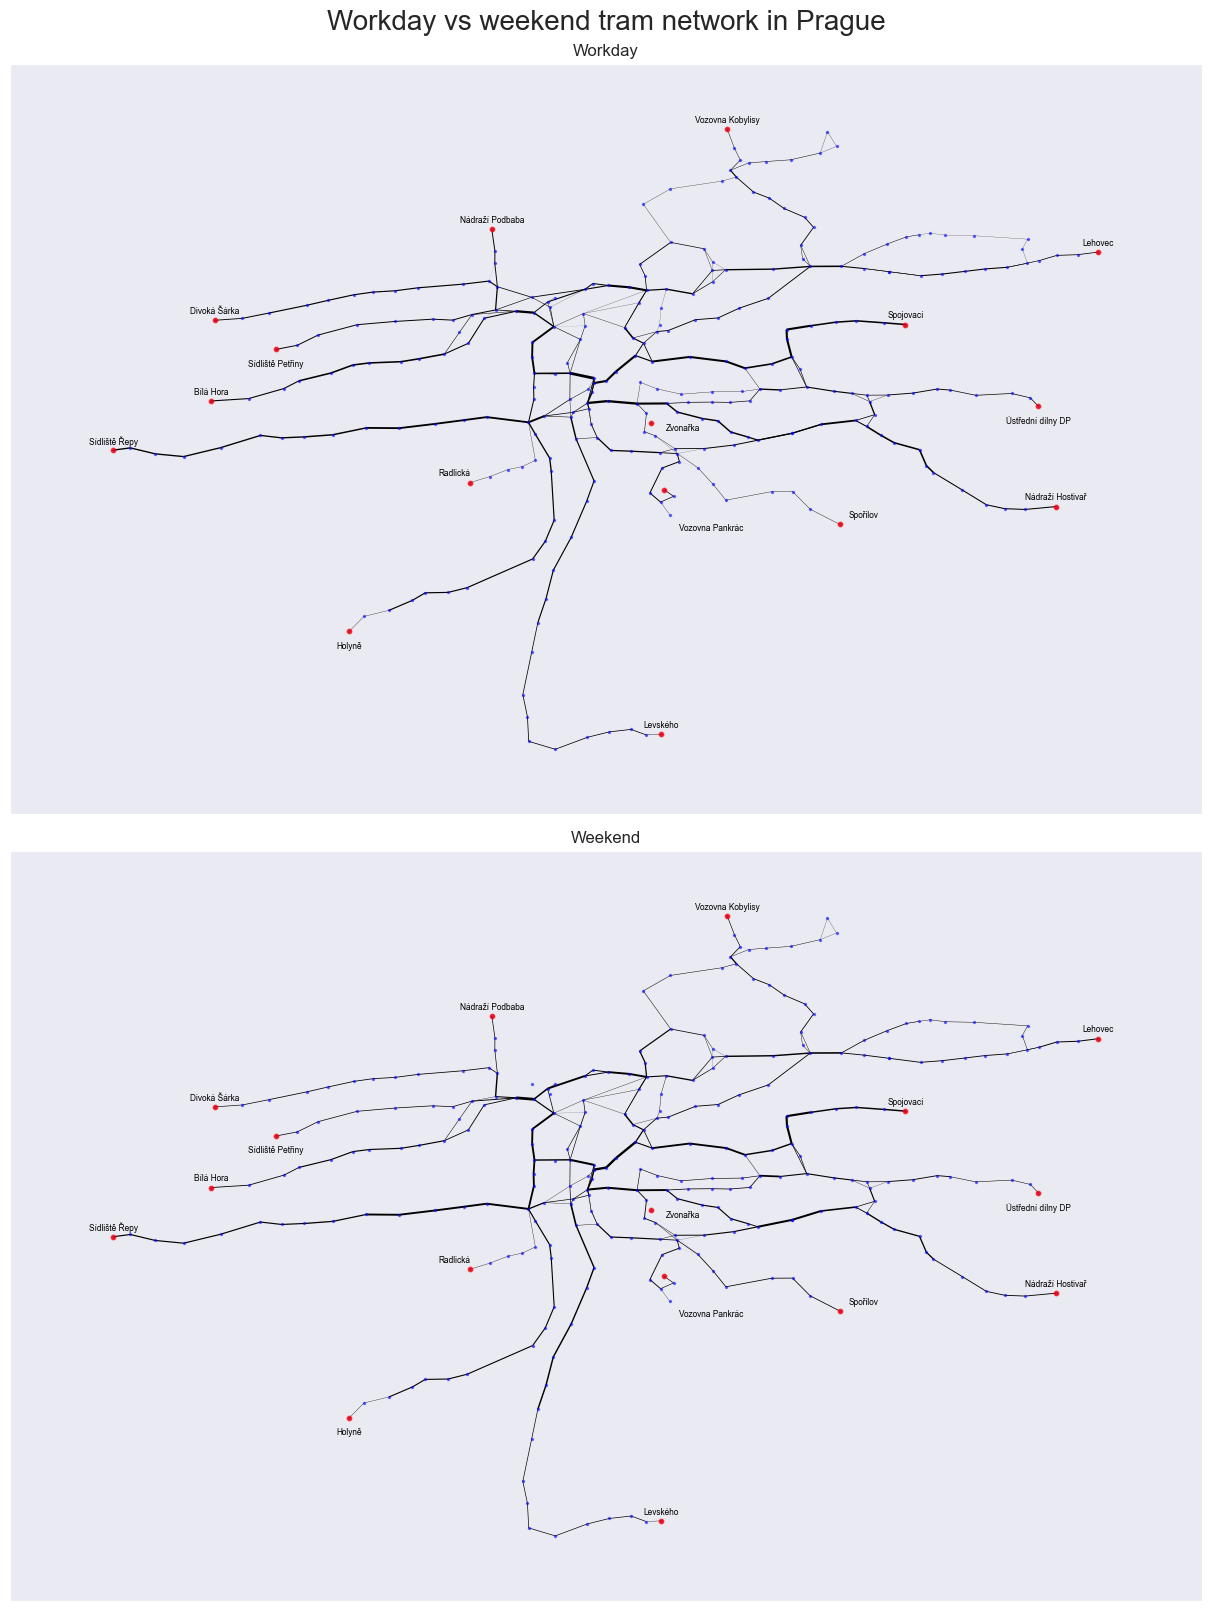

In [43]:
fig = plt.figure(figsize=(12,16), constrained_layout=True)
fig.suptitle('Workday vs weekend tram network in Prague', fontsize = 20)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(spec[0, :]) 
ax2 = fig.add_subplot(spec[1, :]) 
weightGraph(WorkdayG, widthsWork, ax1, 'Workday')
weightGraph(WeekendG, widthsWeekend, ax2, 'Weekend')

Zde vidíme, že rozdíly v relativní vytíženosti jednotlivých úseků je malý rozdíl. Především vidíme, že úseky v periferních, více vzdálelných od centra, jsou o znatelně méně vytížené než úseky v centru. Ty v centru jsou naopak více koncentrované, což je nejspíš důsledek faktu, že o víkendu je v Praze více turistů.